## EDA - Google Playstore Dataset 2014 - 2018


## Introduction

With the rapid growth of smartphones and mobile applications, app marketplaces have become extremely competitive. The Google Play Store is one of the largest digital distribution platforms, hosting millions of Android applications across various categories such as Games, Education, Business, Health, and Entertainment. These apps differ widely in terms of popularity, user ratings, size, pricing, and installation counts.

This project performs EDA and Feature Engineering on the Google Play Store dataset to gain insights into app performance and user preferences. The analysis aims to identify the most popular app categories, the applications with the highest number of installs, largest app sizes, and other key factors that influence an app’s success. These insights can help developers, marketers, and business stakeholders make informed decisions regarding app development, optimization, and market strategy.

The data consists of 20 column and 10841 rows.

## Business Questions Based on Available Columns 
1. Category & Popularity
    * Which app category has the highest number of apps on the Google Play Store?
    * Which categories receive the maximum total installs?
    * Which genres are most popular within each category?
2. User Engagement & Ratings
    * What is the average rating per category?
    * Do apps with higher ratings receive more installs?
    * Does the number of reviews influence an app’s rating?
    * Which categories have the most user engagement based on review count?
3. App Size & Performance
    * Is there a relationship between app size and user ratings?
    * Do smaller-sized apps get more installs compared to larger apps?
    * Which categories tend to have larger app sizes?
4. Free vs Paid Apps
      * Are free apps downloaded more than paid apps?
    * What is the average rating of free apps vs paid apps?
     * Which categories contain the highest number of paid apps?
    * How does app price affect installs for paid apps?
5. Content Rating & Audience
     * Which content rating (Everyone, Teen, Mature, etc.) is most common?
      * Do apps with ‘Everyone’ content rating receive more installs?
     * How does content rating vary across categories?
6. Market & Business Insights
    * Which categories show high demand but low competition (good for new app development)?
    *  What combination of price, size, and rating leads to higher installs?
    * Which app features are most important for business success on the Play Store?

## Report Structure 
This report is organized as follows:

1.Data Overview – Provides an overview of the Google Play Store dataset, including the data source, number of records and features, description of key variables, and initial observations about the data.

2.Data Preprocessing – Covers data cleaning steps such as handling missing values, correcting data types, removing inconsistencies, and preparing the dataset for analysis and feature engineering.

3.Exploratory Data Analysis – Involves statistical analysis and visualizations to explore relationships between variables such as app category, ratings, installs, reviews, size, and pricing. This section highlights key patterns, trends, and insights derived from the data.

4.Conclusion – Summarizes the main findings and insights obtained from the exploratory data analysis and feature engineering process.

5.Recommendations – Provides actionable recommendations for app developers and businesses based on the analysis results, such as category selection, pricing strategy, and app optimization.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # use to handle warning message 

warnings.filterwarnings("ignore") # use to hide all the warning messages    

%matplotlib inline 
# display plots directly inside the notebook output cell

In [2]:
df=pd.read_csv(r'C:\Users\admin\Downloads\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has msising values

In [7]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning

In [8]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [9]:
# df['Reviews'].astype(int)

In [10]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [11]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_copy=df.copy()

In [13]:
df_copy=df_copy.drop(df_copy.index[10472])

In [14]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
## Convert Review Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [17]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [19]:
#19000K==19M
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [20]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [21]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [23]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [24]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [28]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [29]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [31]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [32]:
df_copy.to_csv('google_cleaned.csv', index=False)


## EDA


In [33]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [34]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## Observation
The dataset has duplicate records

In [35]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [36]:
df_copy.shape

(9659, 16)

In [37]:
df_copy.to_csv('google_cleaned__updated.csv', index=False)

In [38]:
df1=pd.read_csv('google_cleaned__updated.csv')

In [39]:
df1.shape

(9659, 16)

## Explore Data

In [40]:
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

We have 8 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


##  Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [41]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df1[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271

## Are the numerical variables normally distributed or skewed?

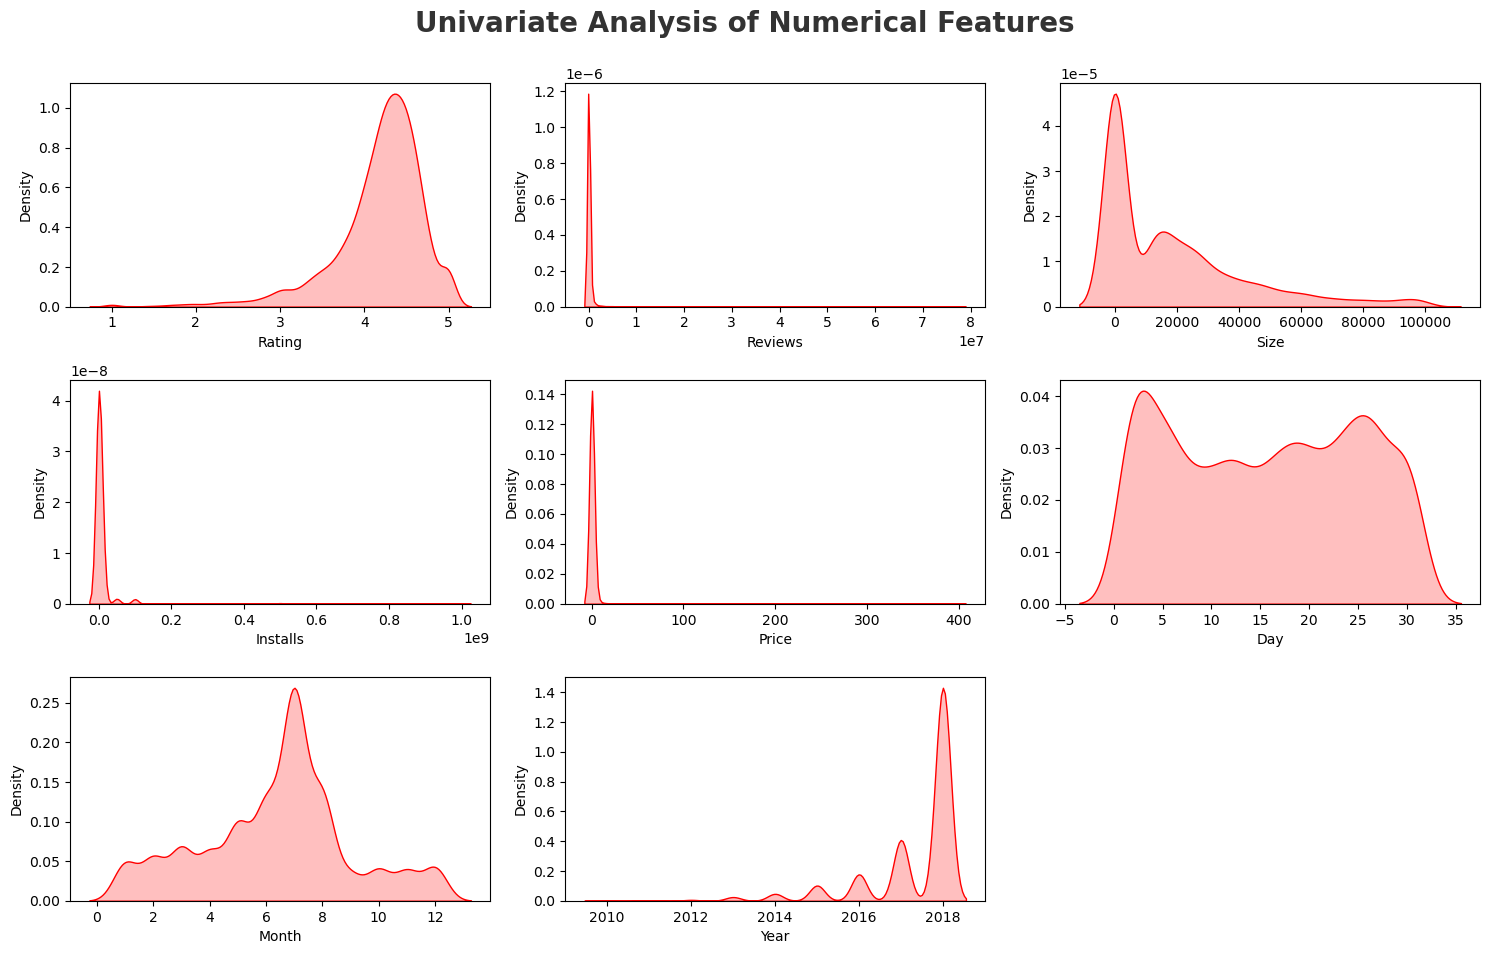

In [42]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1) # Arranges plots in a 5 × 3 grid layout.
    sns.kdeplot(x=df1[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show() 


## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

These KDE plots show that most app-related features like installs, reviews, and price are highly right-skewed, while ratings are concentrated at higher values, indicating user preference toward highly rated and free apps.

## Which type of app (Free or Paid) dominates the market?

## What is the distribution of apps across different content ratings (Everyone, Teen, Mature, etc.)?

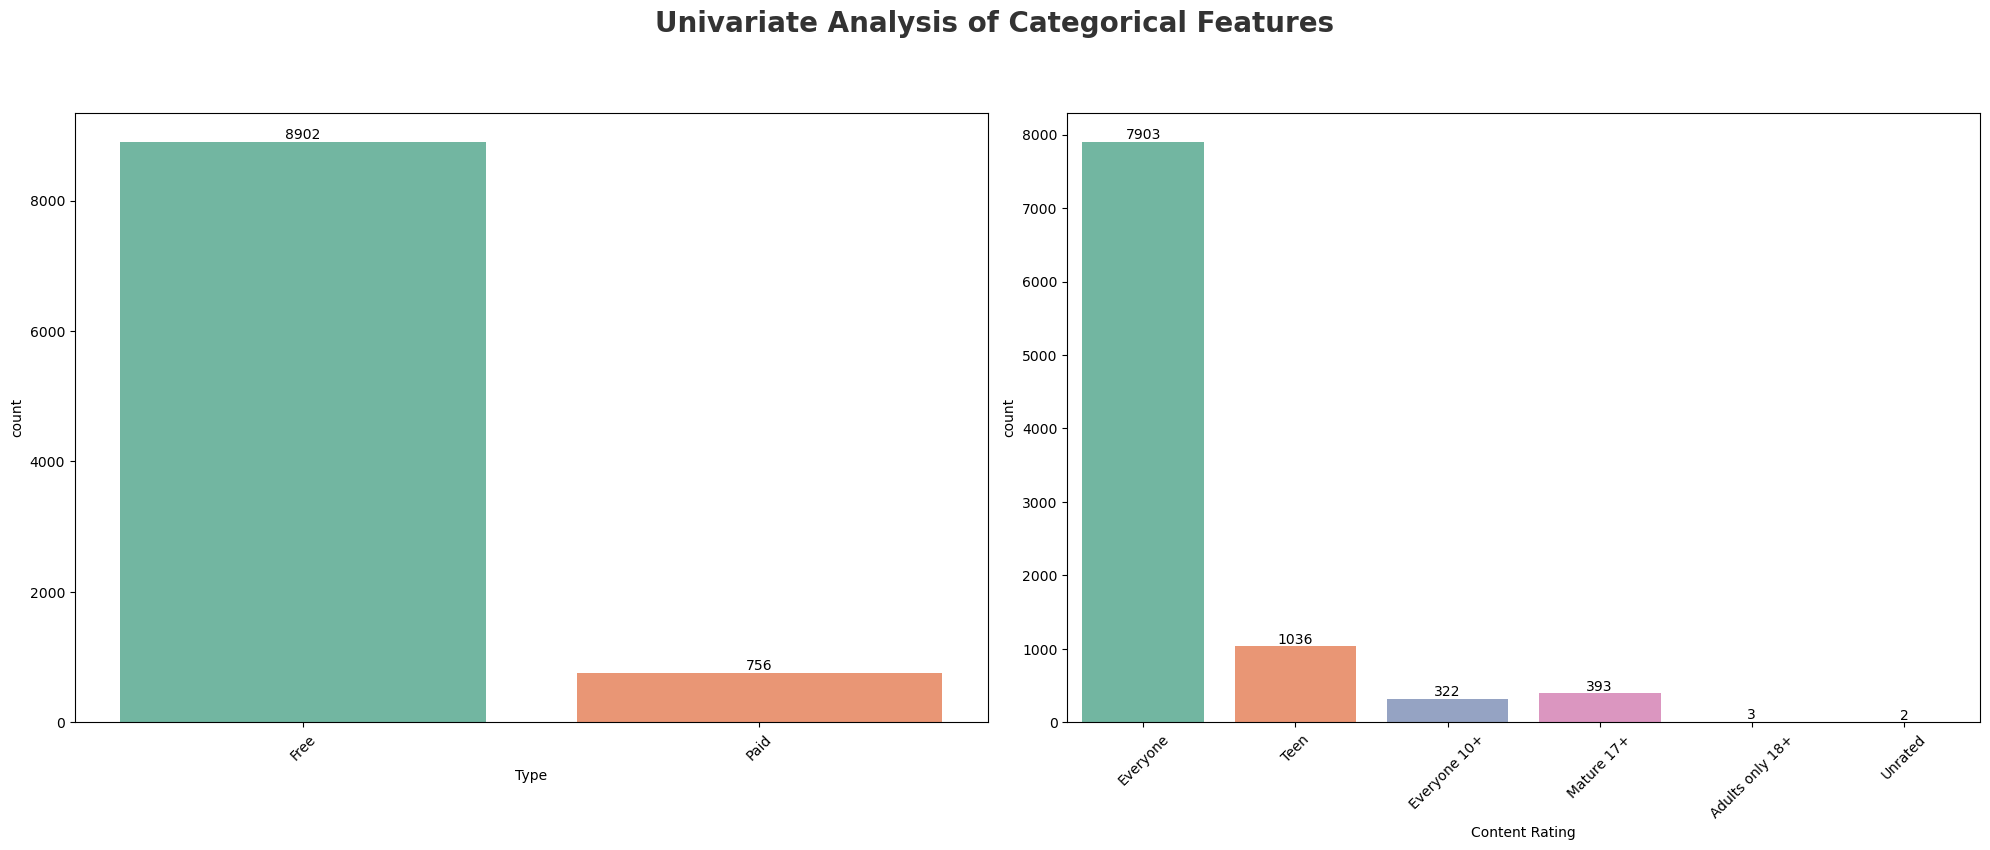

In [43]:
plt.figure(figsize=(20, 15))
plt.suptitle(
    'Univariate Analysis of Categorical Features',
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=0.98
)

category = ['Type', 'Content Rating']

for i in range(len(category)):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=df1[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    
    # add numbers on bars
    for container in ax.containers: 
        ax.bar_label(container)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Which is the most popular app category?

In [44]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


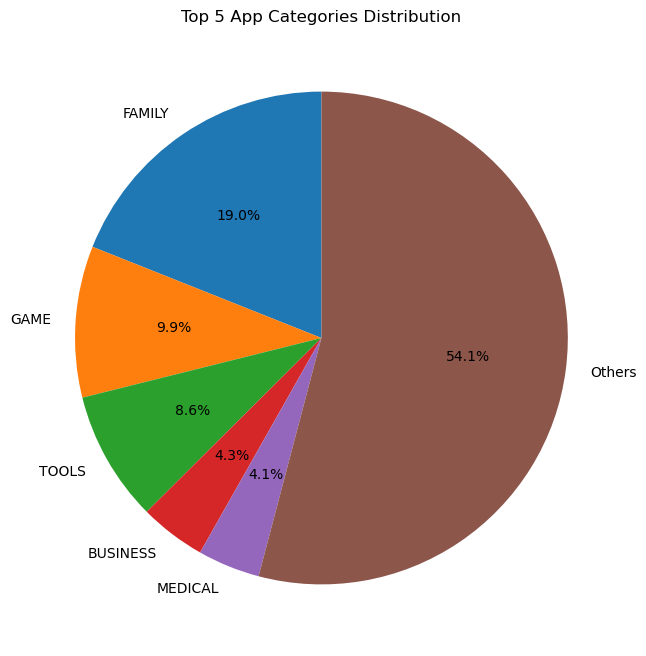

In [45]:
cat_counts = df1['Category'].value_counts()

# top 5 categories
top5 = cat_counts.head(5)

# group remaining as Others
others = pd.Series({'Others': cat_counts.iloc[5:].sum()})

final_cat = pd.concat([top5, others])

# plot pie chart
plt.figure(figsize=(8,8))
final_cat.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Top 5 App Categories Distribution')
plt.ylabel('')
plt.show()

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

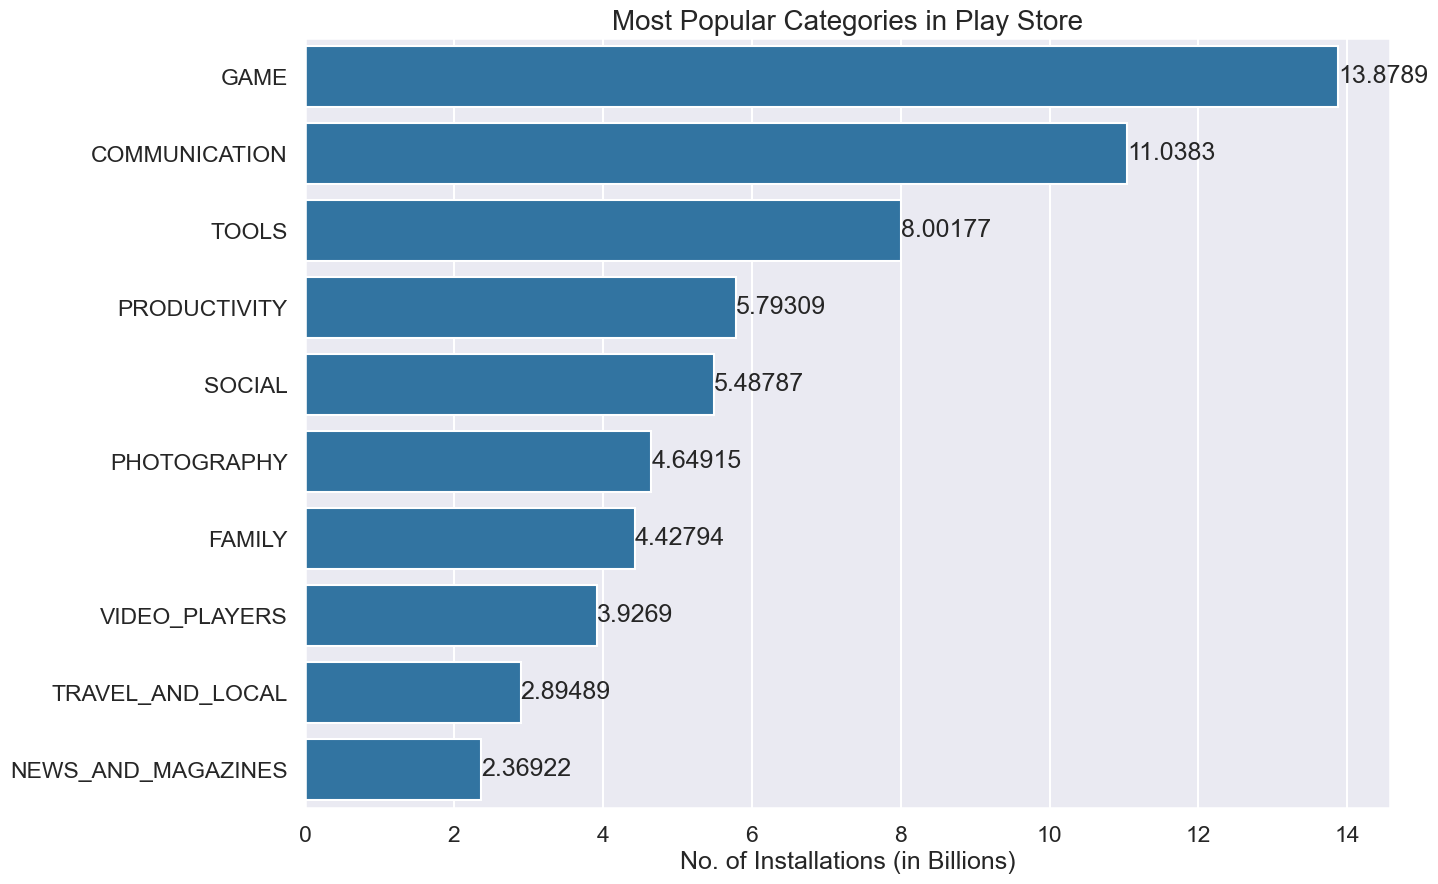

In [46]:
df_cat_installs = (
    df1.groupby('Category')['Installs']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Convert installs to billions
df_cat_installs['Installs'] = df_cat_installs['Installs'] / 1_000_000_000

# Take top 10 categories
df2 = df_cat_installs.head(10)

# Plot
plt.figure(figsize=(14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(
    x='Installs',
    y='Category',
    data=df2
)

# Labels and title
ax.set_xlabel('No. of Installations (in Billions)')
ax.set_ylabel('')
ax.set_title('Most Popular Categories in Play Store', fontsize=20)

# Show values on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

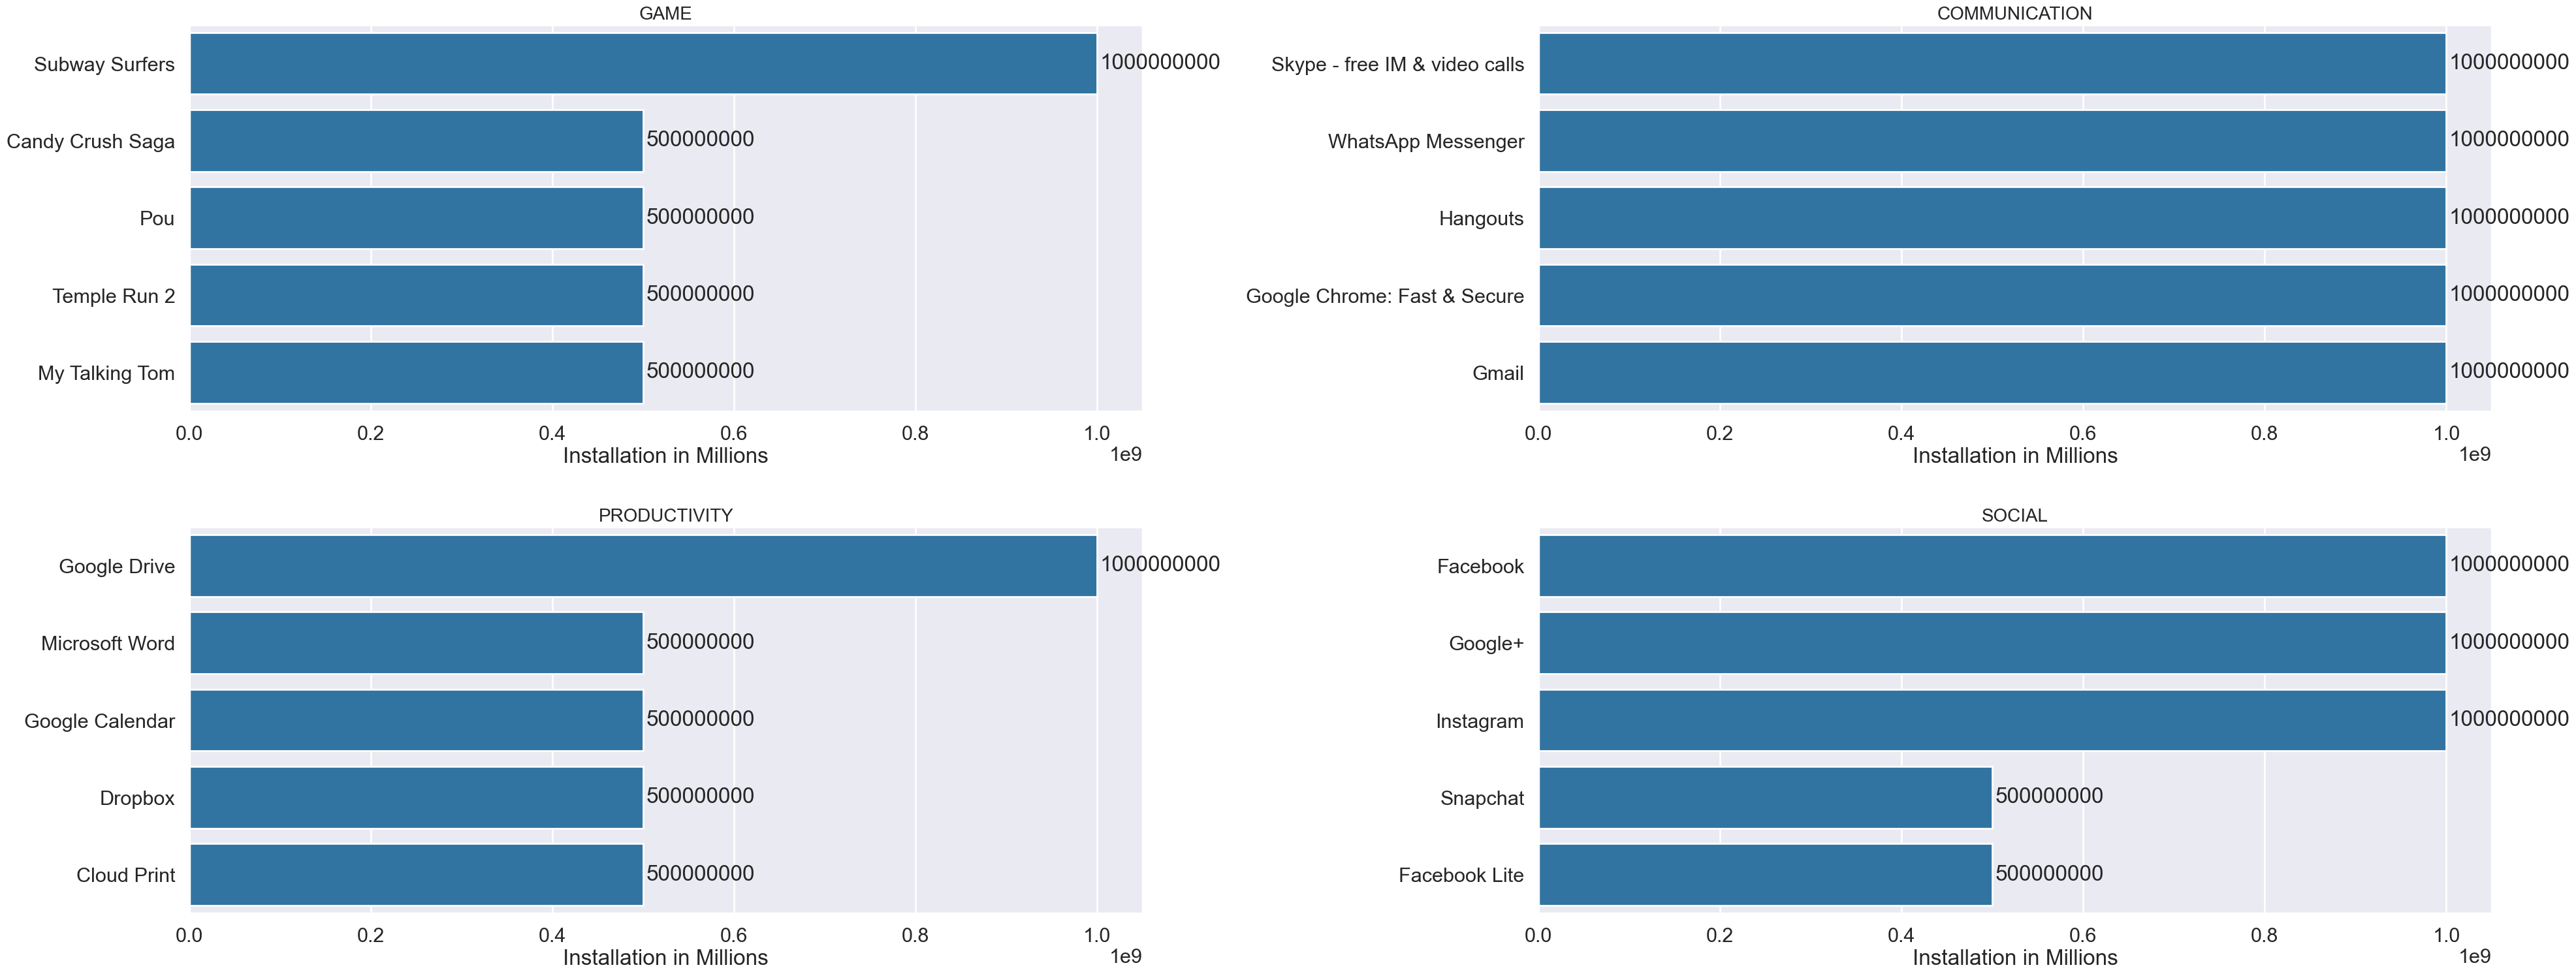

In [47]:

dfa = df1.groupby(['Category', 'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending=False)

apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']

sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i, app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)

    plt.subplot(4, 2, i + 1)
    ax = sns.barplot(data=df3, x='Installs', y='App')

    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app, size=20)

    # 🔹 add numbers on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## Which numerical features are most strongly related to app installs?

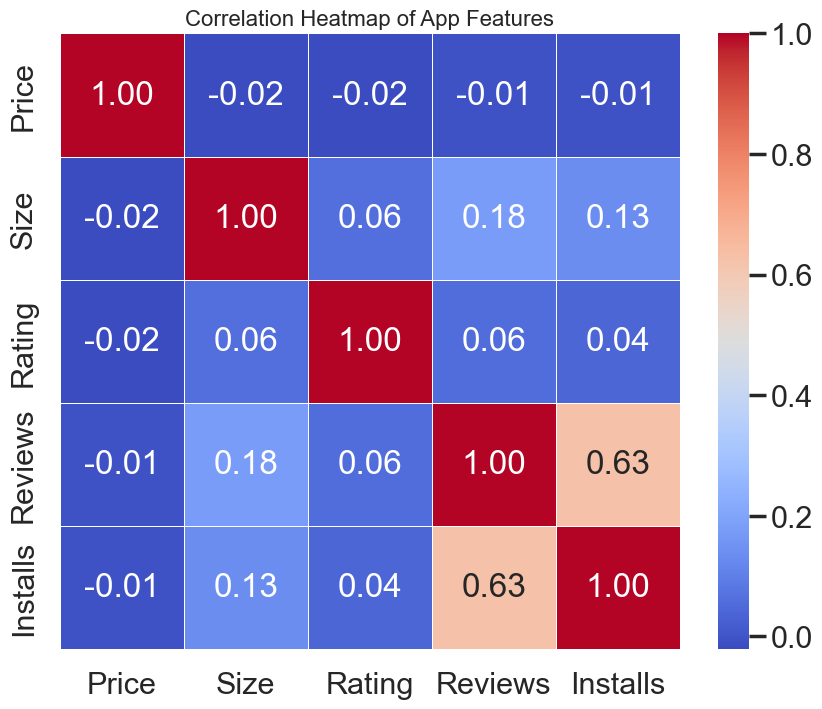

In [48]:
corr_data = df1[['Price', 'Size', 'Rating', 'Reviews', 'Installs']]

# compute correlation matrix
corr_matrix = corr_data.corr()

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Correlation Heatmap of App Features', fontsize=16)
plt.show()

# Observation 

Reviews and installs show a strong positive correlation

Price has a negative correlation with installs

Rating has a weak to moderate positive correlation with installs

App size has a weak correlation with installs and ratings

Reviews have a moderate positive correlation with ratings

## Distribution of app ratings on the Google Play Store.

X-axis (Rating): App ratings (from 1 to 5)

Y-axis (Frequency): Number of apps in each rating range

Each bar shows how many apps fall within a specific rating interval

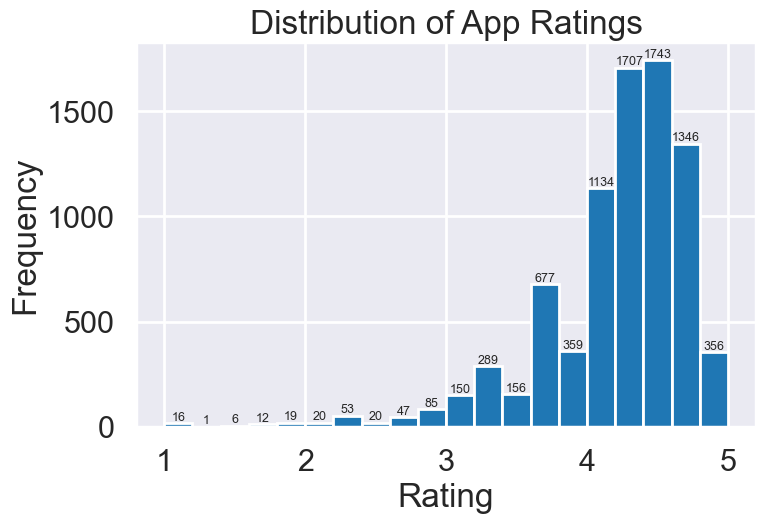

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
# plot histogram
counts, bins, patches = ax.hist(
    df1['Rating'].dropna(),
    bins=20
)
for count, patch in zip(counts, patches):
    if count > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            count,
            int(count),
            ha='center',
            va='bottom',
            fontsize=9
        )

ax.set_title('Distribution of App Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')

plt.show()


## How many apps were updated each year?

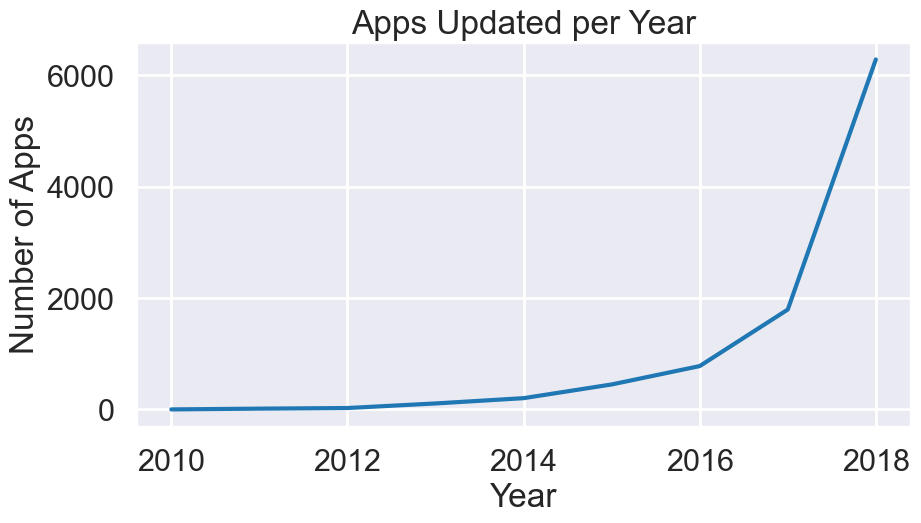

In [50]:
df1['Year'].value_counts().sort_index().plot(
    kind='line',
    figsize=(10,5),
    title='Apps Updated per Year'
)
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.show()


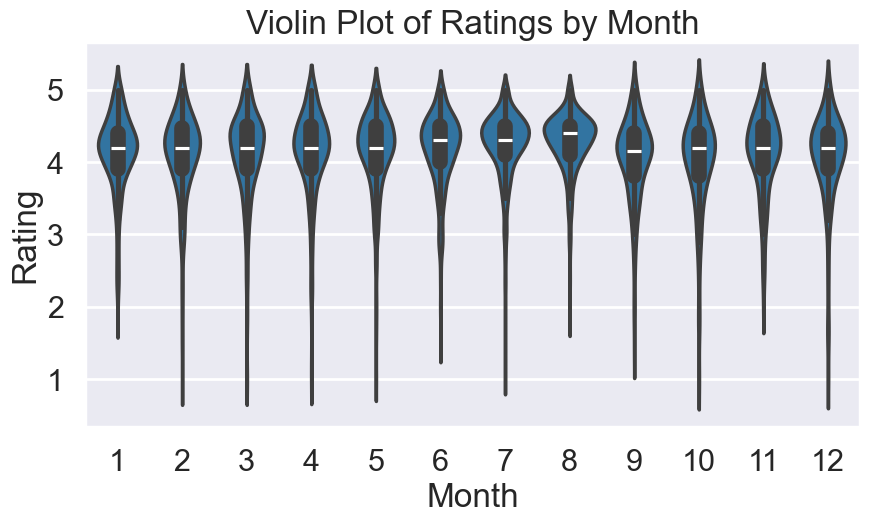

In [58]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Month', y='Rating', data=df1)
plt.title('Violin Plot of Ratings by Month')
plt.show()

All violins have similar width and shape

No month shows extreme deviation

Suggests no strong seasonal effect on ratings

## Conclusion 
In this project, Exploratory Data Analysis and Feature Engineering were performed on the Google Play Store dataset to understand key factors influencing app popularity and business success. 

The dataset was carefully cleaned and preprocessed by handling missing values, correcting data types, and transforming important features such as installs, price, size, and update dates.

Exploratory Data Analysis revealed that Free apps dominate the Play Store and receive significantly higher installs compared to paid apps. 

Categories such as Communication, Social, and Game attract the highest number of downloads, indicating strong user demand. 

The analysis also showed that most apps are highly rated, with ratings generally skewed toward the higher end, while reviews and installs are right-skewed, meaning only a few apps achieve extremely high popularity.

## Recommendations

 Focus on High-Demand, Low-Competition Categories

 Adopt a Free or Low-Pricing Strategy

Improve User Engagement to Increase Installs

Maintain High App Quality and Ratings

Optimize App Size for Better Performance

Target the ‘Everyone’ Content Rating Segment

